# Capstone Project: Develop a predictive model to classify borrowers 
### By: Pulani Gayanika Jayasena
**Objective**: To build a machine learning model that predicts loan defaulters based on financial and demographic data.


## Table of Contents
1. [Introduction](#introduction)
2. [Data Loading and Preprocessing](#data-loading-and-preprocessing)
3. [Initial Data Analysis](#initial-data-analysis)
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
   4.1 [Distribution Analysis](#distribution-analysis)
   4.2 [Categorical Data Analysis](#categorical-data-analysis)
   4.3 [T-Test & Chi-Square Test](#t-test-and-chi-square-test)
   4.4 [Correlation Analysis](#correlation-analysis)
5. [Feature Engineering](#feature-engineering)
   5.1 [Conversion of Date Columns](#conversion-of-date-columns)
   5.2 [Encoding](#encoding)
6. [Model Building](#model-building)
7. [Model Evaluation](#model-evaluation)
8. [Discusion](#discusion)
9. [Model Validation & Reccomendations](#model_validation_ & Reccomendations)

## Introduction

In the financial industry, accurately assessing the creditworthiness of borrowers is essential for lenders to mitigate financial losses and maintain a healthy lending portfolio. This project aims to develop a machine learning model that predicts defaulters and non-defaulters based on financial and demographic data, helping lenders identify high-risk borrowers before granting loans or credit.

## Data Loading and Preprocessing

In [3]:
#import libraries
import pandas as pd
import numpy as np


In [5]:
#loading data
df = pd.read_csv(r"C:\Users\Pulani\Desktop\NTUCLHUB\MYPROJECT_CAPSTONE\Project 1 - Finance - Predictive Analytics\Dataset\loan.csv")
print ("Data loaded successfully!")

# Display the first few rows of the dataset
df.head()

Data loaded successfully!


,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05-04-2018,23-04-2018,24-04-2018,14-08-2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30-12-2022,31-12-2022,12-01-2023,05-04-2023,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15-11-2019,18-11-2019,27-11-2019,24-02-2020,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25-08-2021,08-09-2021,11-09-2021,25-02-2022,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,02-09-2020,07-09-2020,11-09-2020,29-12-2020,False


## Initial Data Analysis

In [14]:
# Check the number of rows and columns
df.shape

(5000, 17)

In [18]:
# Check the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        5000 non-null   object 
 1   loan_id            5000 non-null   object 
 2   loan_type          5000 non-null   object 
 3   loan_amount        5000 non-null   int64  
 4   interest_rate      5000 non-null   float64
 5   loan_term          5000 non-null   int64  
 6   employment_type    5000 non-null   object 
 7   income_level       5000 non-null   object 
 8   credit_score       5000 non-null   int64  
 9   gender             5000 non-null   object 
 10  marital_status     5000 non-null   object 
 11  education_level    5000 non-null   object 
 12  application_date   5000 non-null   object 
 13  approval_date      5000 non-null   object 
 14  disbursement_date  5000 non-null   object 
 15  due_date           5000 non-null   object 
 16  default_status     5000 

In [20]:
#Column names
df.columns

Index(['customer_id', 'loan_id', 'loan_type', 'loan_amount', 'interest_rate',
       'loan_term', 'employment_type', 'income_level', 'credit_score',
       'gender', 'marital_status', 'education_level', 'application_date',
       'approval_date', 'disbursement_date', 'due_date', 'default_status'],
      dtype='object')

In [40]:
#Default_Status Value counts
df["default_status"].value_counts()

default_status
False    4001
True      999
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

In [26]:
# Check for missing values in each column
df.isnull().sum()

customer_id          0
loan_id              0
loan_type            0
loan_amount          0
interest_rate        0
loan_term            0
employment_type      0
income_level         0
credit_score         0
gender               0
marital_status       0
education_level      0
application_date     0
approval_date        0
disbursement_date    0
due_date             0
default_status       0
dtype: int64

In [28]:
# Check for duplicate values in each column
df.duplicated().sum()

0

In [30]:
# Summary statistics for numerical columns
df.describe()

,loan_amount,interest_rate,loan_term,credit_score
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,49929.868000,0.079579,35.263000,573.206000
std,28721.249529,0.015230,13.792501,158.647522
min,1055.000000,0.031685,12.000000,300.000000
25%,24953.500000,0.069240,24.000000,435.000000
50%,49730.000000,0.079533,35.000000,571.000000
75%,75083.500000,0.089984,47.000000,712.000000
max,99989.000000,0.138894,59.000000,849.000000


In [32]:
# Summary statistics for categorical columns
df.describe(include=['object'])  

,customer_id,loan_id,loan_type,employment_type,income_level,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,3121,3159,4,3,3,2,3,4,1711,1732,1723,1764
top,CUST-00000917,LN00004823,Personal Loan,Part-time,Low,Male,Divorced,PhD,16-10-2019,28-02-2019,09-06-2020,04-03-2022
freq,7,5,1281,1672,1713,2542,1682,1282,10,10,12,10


In [38]:
# Data types and Unique values
columns = ['loan_type', 'employment_type', 'income_level','gender','marital_status','education_level',]
for col in columns:
    print(f"Unique values in {col}: {df[col].nunique()}")

Unique values in loan_type: 4
Unique values in employment_type: 3
Unique values in income_level: 3
Unique values in gender: 2
Unique values in marital_status: 3
Unique values in education_level: 4


### Distribution Analysis

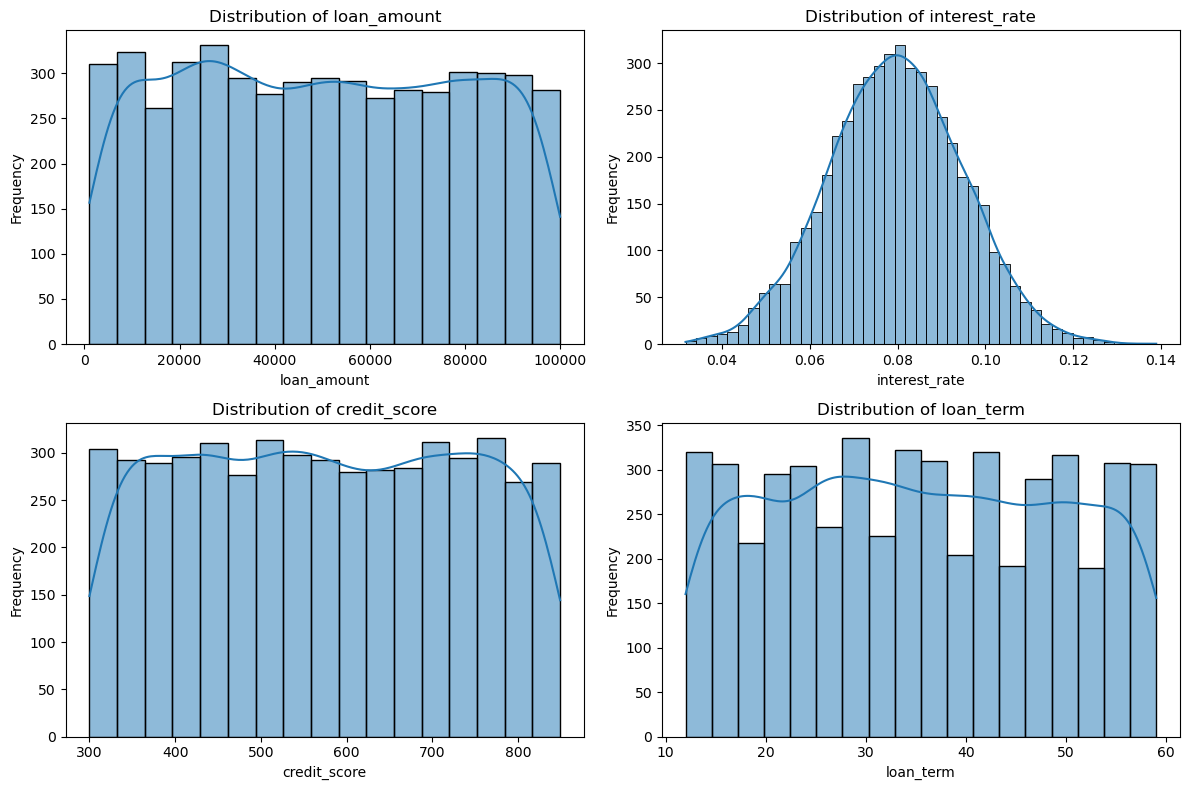

In [42]:
#distribution plots for key features (numerical columns)
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Distribution plots for key features
key_features = ['loan_amount', 'interest_rate', 'credit_score', 'loan_term']

# Set up the figure with 2 rows and 2 columns
plt.figure(figsize=(12, 8))

# Plot distributions
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Summary**

- **Loan Amount:** The distribution appears relatively uniform across the range, indicating that loans of various amounts are fairly evenly distributed.

- **Interest Rate:** This has a roughly bell-shaped (normal) distribution, which suggests that most loans are issued at around 7-8% interest rates.

- **Credit Score:** The credit score distribution seems relatively uniform across different score ranges, meaning the dataset contains borrowers with varying credit scores.

- **Loan Term:** This also appears fairly uniform, with terms spread across the range from around 12 to 60 months.

### Categorical Data Analysis

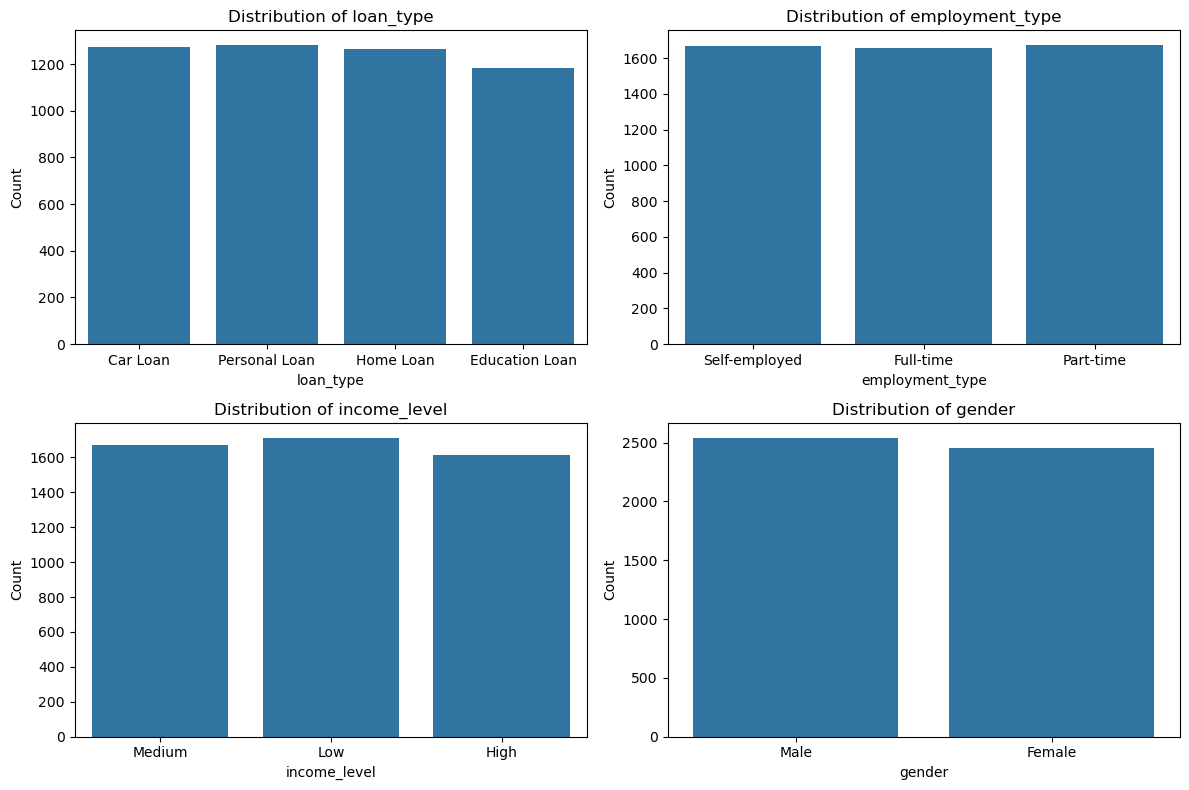

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Distribution plots for key categorical features
categorical_features = ['loan_type', 'employment_type', 'income_level', 'gender']

# Set up the figure with 2 rows and 2 columns
plt.figure(figsize=(12, 8))

# Plot bar plots for each categorical feature
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


**Summary - Categorical Distribution**

The dataset appears balanced across most of the categorical features, which is beneficial for building a machine learning model. Balanced categories reduce the risk of bias in the model.

### T-Test & Chi-Square Test 
**has been completed on another JupiterNoteBook** attach the link

### Corretaion Analysis
- As prerequisite all columns should be numerical

#### Correlation Heatmap

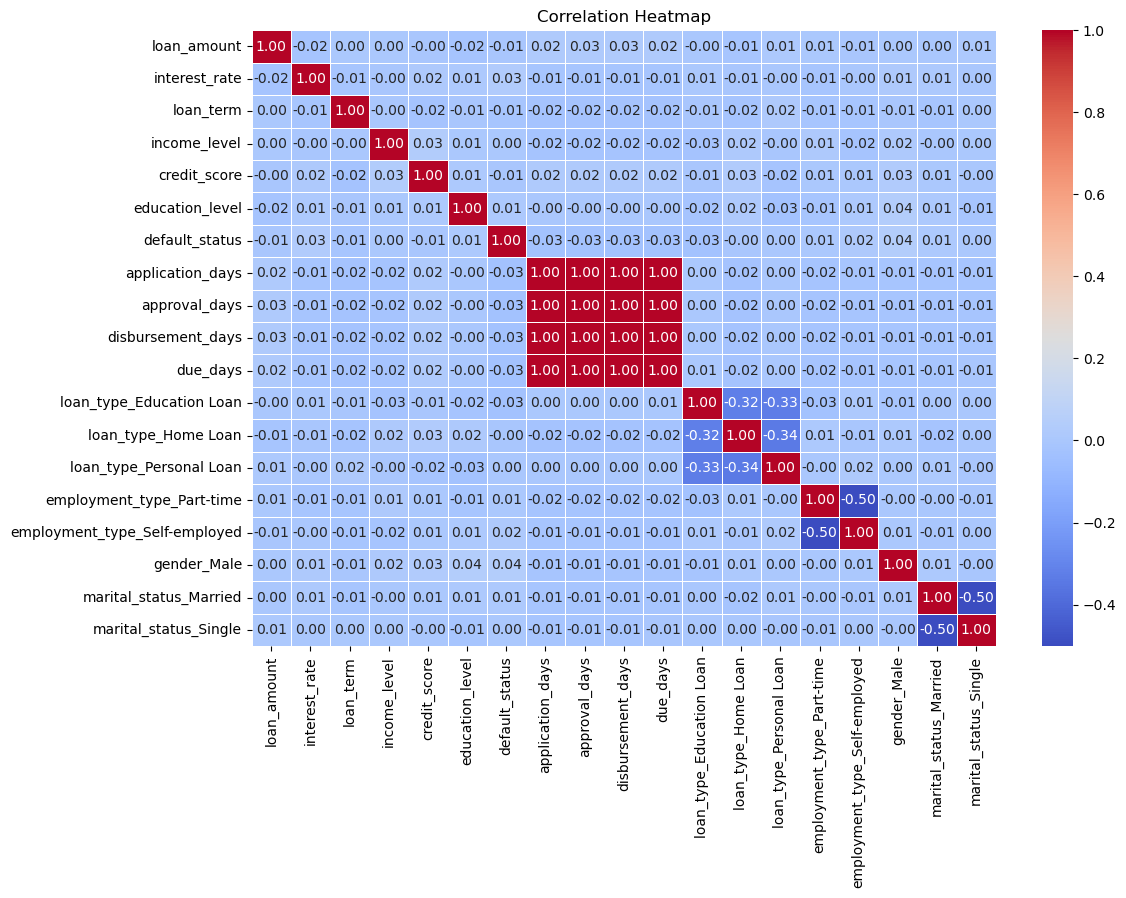

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Correlation heatmap
plt.figure(figsize=(12, 8))  # Set the figure size for better readability

# Create a heatmap using the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title to the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

- **Correlation Heatmap- Summary**
    - Low Correlations with Target (default_status)
    - Since default_status does not have high linear correlations with other variables, models like Logistic Regression might not perform well without feature engineering. Tree-based models like Random Forest or XGBoost, which capture **non-linear relationships**, could perform better.

- **Box Plots**
    - To identify outliers

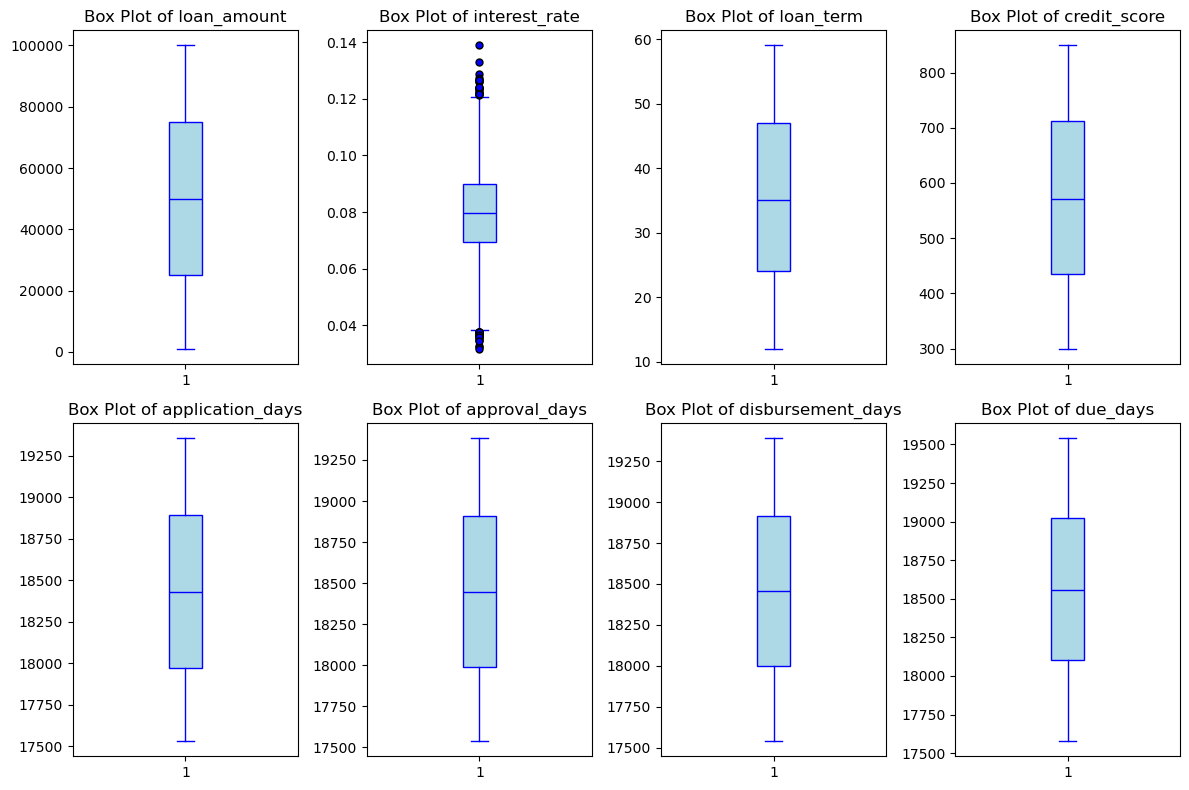

In [135]:
import matplotlib.pyplot as plt

# Specify the columns for which you want box plots
columns_to_plot = ['loan_amount', 'interest_rate', 'loan_term', 'credit_score', 'application_days', 'approval_days', 'disbursement_days', 'due_days']

# Plot box plots for the specified columns
plt.figure(figsize=(12, 8))  # Adjust figure size for better layout

# Adjust the number of rows and columns for the subplots (4 columns and 2 rows)
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns
    box = plt.boxplot(df[col], patch_artist=True, 
                      boxprops=dict(facecolor='lightblue', color='blue'),
                      medianprops=dict(color='blue'),
                      whiskerprops=dict(color='blue'),
                      capprops=dict(color='blue'),
                      flierprops=dict(markerfacecolor='blue', marker='o', markersize=5))
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


- **Box Plots- Summary**

- **interest_rate column**, shows a high number of outliers compared to the other variables.

- Why does the interest rate have many outliers?
    - **Natural variation in interest rates**: Interest rates often have more distinct tiers depending on factors like creditworthiness, loan type, market conditions, etc. This can cause certain values to be significantly higher or lower than the rest, especially if certain loans have special rates (promotions, variable interest rates, etc.).
    - **Possible credit score dependence**: Interest rates tend to vary more sharply based on factors like the borrower’s credit score. If your dataset contains a wide range of credit scores, borrowers with lower scores might be assigned higher interest rates, leading to these outliers.
    - **Loan types**: Different loan types (e.g., car loans, personal loans, home loans) typically have different interest rate structures. If one type has consistently lower or higher interest rates, this may result in those being seen as outliers.
    - **Data issues**: Outliers could also be due to data entry issues, such as wrong decimal points, or incorrect values. A quick check of the interest_rate values might help verify if these outliers are legitimate or result from data errors.
    
- Loan Amount, Loan Term, and Credit Score: have relatively fewer outliers
- Application, Approval, Disbursement, and Due Days: have relatively tight ranges with no apparent outliers

## Feature Engineering

**Convert data types** 
- To icrease Efficiency, model performance and data intergrity
- Creating New Features,Encoding Categorical Variables,Date and Time Features,Normalization and Scaling,Feature Selection

### Conversion of Date Columns

In [55]:
# Set the reference date to January 1, 1970 (Unix Epoch)
reference_date = pd.to_datetime('1970-01-01')

# Convert date columns to datetime format, with day first
df['application_date'] = pd.to_datetime(df['application_date'], dayfirst=True)
df['approval_date'] = pd.to_datetime(df['approval_date'], dayfirst=True)
df['disbursement_date'] = pd.to_datetime(df['disbursement_date'], dayfirst=True)
df['due_date'] = pd.to_datetime(df['due_date'], dayfirst=True)

# Calculate the number of days since the reference date (Unix Epoch)
df['application_days'] = (df['application_date'] - reference_date).dt.days
df['approval_days'] = (df['approval_date'] - reference_date).dt.days
df['disbursement_days'] = (df['disbursement_date'] - reference_date).dt.days
df['due_days'] = (df['due_date'] - reference_date).dt.days

# Drop the original date columns
df = df.drop(['application_date', 'approval_date', 'disbursement_date', 'due_date'], axis=1)

# Check the updated DataFrame
print("Updated DataFrame after processing date columns:")
df.head()

Updated DataFrame after processing date columns:


,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status,application_days,approval_days,disbursement_days,due_days
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,False,17626,17644,17645,17757
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,False,19356,19357,19369,19452
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,False,18215,18218,18227,18316
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,False,18864,18878,18881,19048
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,False,18507,18512,18516,18625


### Encoding 

#### Label Encoding for "education_level" and "income_level" Columns

In [58]:
#Unique values in education_level
df["education_level"].unique()

array(['Master', 'Bachelor', 'High School', 'PhD'], dtype=object)

In [60]:
#Unique values in income_level
df["income_level"].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [62]:
from sklearn.preprocessing import LabelEncoder

# Initialize separate LabelEncoders for each column
income_encoder = LabelEncoder()
education_encoder = LabelEncoder()

# Apply LabelEncoder to income_level and education_level columns
df['income_level'] = income_encoder.fit_transform(df['income_level']) + 1
df['education_level'] = education_encoder.fit_transform(df['education_level']) + 1

# Optional: Print the mappings for verification
income_mapping = {label: num + 1 for num, label in enumerate(income_encoder.classes_)}
education_mapping = {label: num + 1 for num, label in enumerate(education_encoder.classes_)}

print("Income Level Mapping:")
print(income_mapping)

print("Education Level Mapping:")
print(education_mapping)

Income Level Mapping:
{'High': 1, 'Low': 2, 'Medium': 3}
Education Level Mapping:
{'Bachelor': 1, 'High School': 2, 'Master': 3, 'PhD': 4}


### One-Hot Encoding for "employment_type","gender","marital_status","loan_type"

In [64]:
#Unique values in employment_type
df["employment_type"].unique()

array(['Self-employed', 'Full-time', 'Part-time'], dtype=object)

In [66]:
#Unique values in gender
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [68]:
#Unique values in marital_status
df["marital_status"].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [70]:
#Unique values in loan_type 
df["loan_type"].unique()

array(['Car Loan', 'Personal Loan', 'Home Loan', 'Education Loan'],
      dtype=object)

In [72]:
# One-hot encode remaining categorical columns
# Assuming the other categorical columns are 'loan_type', 'employment_type', 'gender', 'marital_status'
df = pd.get_dummies(df, columns=['loan_type', 'employment_type', 'gender', 'marital_status'], drop_first=True, dtype=int)

In [74]:
# Convert default_status (boolean) to int
df['default_status'] = df['default_status'].astype(int)

In [87]:
# Check the updated DataFrame
print("Updated DataFrame after one-hot encoding:")

# Drop the customer_id and loan_id columns
df = df.drop(['customer_id', 'loan_id'], axis=1)

# Check the updated DataFrame
print("Updated DataFrame after dropping customer_id and loan_id:")
df.head()

Updated DataFrame after one-hot encoding:
Updated DataFrame after dropping customer_id and loan_id:


,loan_amount,interest_rate,loan_term,income_level,credit_score,education_level,default_status,application_days,approval_days,disbursement_days,due_days,loan_type_Education Loan,loan_type_Home Loan,loan_type_Personal Loan,employment_type_Part-time,employment_type_Self-employed,gender_Male,marital_status_Married,marital_status_Single
0,16795,0.051852,15,3,833,3,0,17626,17644,17645,17757,0,0,0,0,1,1,0,1
1,1860,0.089296,56,3,776,1,0,19356,19357,19369,19452,0,0,1,0,0,0,1,0
2,77820,0.070470,51,2,697,2,0,18215,18218,18227,18316,0,0,1,0,0,1,0,0
3,55886,0.062155,30,2,795,4,0,18864,18878,18881,19048,0,0,0,0,0,0,1,0
4,7265,0.070635,48,2,519,2,0,18507,18512,18516,18625,0,1,0,1,0,0,1,0


In [89]:
#To ensure that all columns are numerical
print("Data types in numeric DataFrame:")
print(df.dtypes)

Data types in numeric DataFrame:
loan_amount                        int64
interest_rate                    float64
loan_term                          int64
income_level                       int32
credit_score                       int64
education_level                    int32
default_status                     int32
application_days                   int64
approval_days                      int64
disbursement_days                  int64
due_days                           int64
loan_type_Education Loan           int32
loan_type_Home Loan                int32
loan_type_Personal Loan            int32
employment_type_Part-time          int32
employment_type_Self-employed      int32
gender_Male                        int32
marital_status_Married             int32
marital_status_Single              int32
dtype: object


**Since all the columns** in the dataset are **numerical**, a **correlation analysis** is an excellent way to assess the strength and direction of linear relationships between the variables
- Correlation Matrix
- Correlation Heatmap

## Model Building

## Model Evaluation